<a href="https://colab.research.google.com/github/sanjeevm4788/Bike-Sharing-Demand-Prediction/blob/main/Bike_Sharing_Demand_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [ ]:
dataset = pd.read_csv('SeoulBikeData.csv',encoding='cp1252')

In [ ]:
dataset.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [ ]:
dataset.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [ ]:
dataset.tail()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
8759,30/11/2018,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [ ]:
dataset.dtypes

Date                          object
Rented Bike Count              int64
Hour                           int64
Temperature(°C)              float64
Humidity(%)                    int64
Wind speed (m/s)             float64
Visibility (10m)               int64
Dew point temperature(°C)    float64
Solar Radiation (MJ/m2)      float64
Rainfall(mm)                 float64
Snowfall (cm)                float64
Seasons                       object
Holiday                       object
Functioning Day               object
dtype: object

In [ ]:
dataset.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


In [ ]:
dataset.shape

(8760, 14)

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [ ]:
dataset.isna().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

**There is no null values in the dataset that needs to handled**

In [ ]:
dataset=dataset.drop_duplicates()
dataset.shape

(8760, 14)

**No dupilcates in the dataset**

In [ ]:
dataset.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [ ]:
dataset["Holiday"].value_counts()

No Holiday    8328
Holiday        432
Name: Holiday, dtype: int64

In [ ]:
dataset["Functioning Day"].value_counts()

Yes    8465
No      295
Name: Functioning Day, dtype: int64

In [ ]:
dataset["Seasons"].value_counts()

Spring    2208
Summer    2208
Autumn    2184
Winter    2160
Name: Seasons, dtype: int64

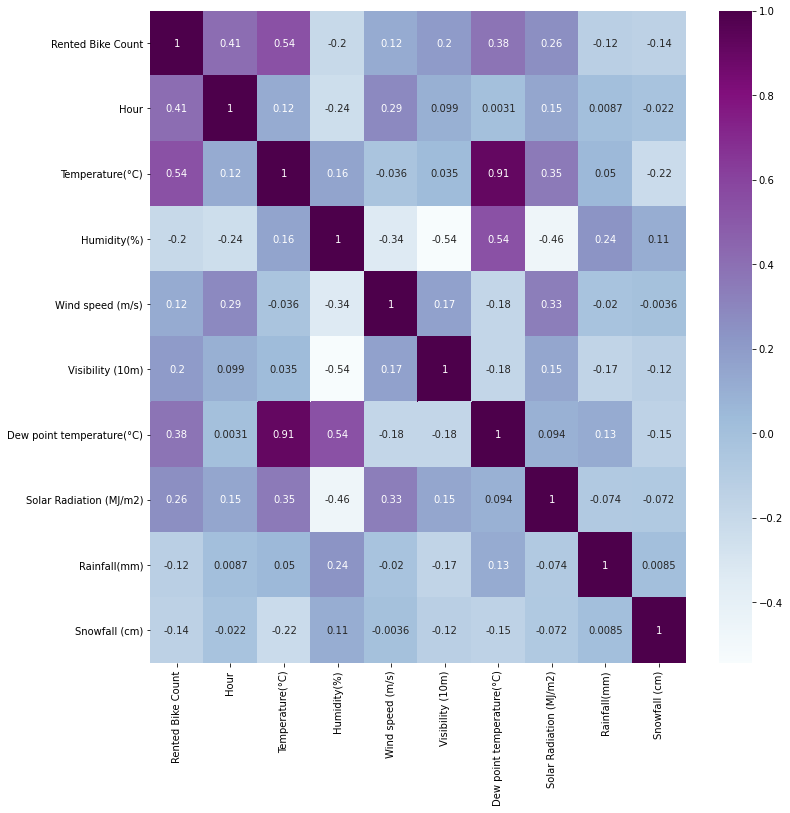

In [ ]:
plt.figure(figsize=(12,12))
sns.heatmap(dataset.corr(), cmap='BuPu', annot=True)

**High correlation between Temperature and Dew point temperature**

In [ ]:
dataset.drop(['Dew point temperature(°C)'],axis=1,inplace=True)

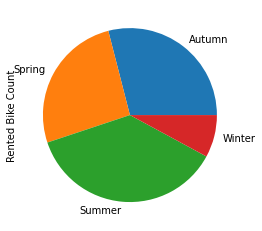

In [ ]:
dataset.groupby('Seasons').sum()['Rented Bike Count'].plot.pie()

**Most bikes are rented on Summer**

In [ ]:
from sklearn import preprocessing

In [ ]:
label_encoder = preprocessing.LabelEncoder()
dataset['Holiday']= label_encoder.fit_transform(dataset['Holiday'])
dataset['Functioning Day']= label_encoder.fit_transform(dataset['Functioning Day'])

In [ ]:
onehotencoder = preprocessing.OneHotEncoder()
X = onehotencoder.fit_transform(dataset.Seasons.values.reshape(-1,1)).toarray()
datasetOneHot = pd.DataFrame(X, columns = ["Seasons_"+str(int(i)) for i in range(X.shape[1])]) 
dataset = pd.concat([dataset, datasetOneHot], axis=1)
dataset.drop(['Seasons'],axis=1,inplace=True)

In [ ]:
dataset.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Holiday,Functioning Day,Seasons_0,Seasons_1,Seasons_2,Seasons_3
0,01/12/2017,254,0,-5.2,37,2.2,2000,0.0,0.0,0.0,1,1,0.0,0.0,0.0,1.0
1,01/12/2017,204,1,-5.5,38,0.8,2000,0.0,0.0,0.0,1,1,0.0,0.0,0.0,1.0
2,01/12/2017,173,2,-6.0,39,1.0,2000,0.0,0.0,0.0,1,1,0.0,0.0,0.0,1.0
3,01/12/2017,107,3,-6.2,40,0.9,2000,0.0,0.0,0.0,1,1,0.0,0.0,0.0,1.0
4,01/12/2017,78,4,-6.0,36,2.3,2000,0.0,0.0,0.0,1,1,0.0,0.0,0.0,1.0


In [ ]:
dataset["Functioning Day"].value_counts()

1    8465
0     295
Name: Functioning Day, dtype: int64

In [ ]:
dataset["Holiday"].value_counts()

1    8328
0     432
Name: Holiday, dtype: int64

In [ ]:
dataset['Seasons_0'].value_counts()

0.0    6576
1.0    2184
Name: Seasons_0, dtype: int64

In [ ]:
dataset['Seasons_1'].value_counts()

0.0    6552
1.0    2208
Name: Seasons_1, dtype: int64

In [ ]:
dataset['Seasons_2'].value_counts()

0.0    6552
1.0    2208
Name: Seasons_2, dtype: int64

In [ ]:
dataset['Seasons_3'].value_counts()

0.0    6600
1.0    2160
Name: Seasons_3, dtype: int64

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Date                     8760 non-null   object 
 1   Rented Bike Count        8760 non-null   int64  
 2   Hour                     8760 non-null   int64  
 3   Temperature(°C)          8760 non-null   float64
 4   Humidity(%)              8760 non-null   int64  
 5   Wind speed (m/s)         8760 non-null   float64
 6   Visibility (10m)         8760 non-null   int64  
 7   Solar Radiation (MJ/m2)  8760 non-null   float64
 8   Rainfall(mm)             8760 non-null   float64
 9   Snowfall (cm)            8760 non-null   float64
 10  Holiday                  8760 non-null   int64  
 11  Functioning Day          8760 non-null   int64  
 12  Seasons_0                8760 non-null   float64
 13  Seasons_1                8760 non-null   float64
 14  Seasons_2               

In [ ]:
dataset['Date'] = dataset['Date'].astype('datetime64[ns]')

In [ ]:
import datetime as dt

In [ ]:
dataset['day'] = dataset["Date"].dt.day
dataset['month'] = dataset['Date'].dt.month
dataset['year'] = dataset['Date'].dt.year

In [ ]:
dataset.drop(['Date'],axis=1,inplace=True)

In [ ]:
dataset.head()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Holiday,Functioning Day,Seasons_0,Seasons_1,Seasons_2,Seasons_3,day,month,year
0,254,0,-5.2,37,2.2,2000,0.0,0.0,0.0,1,1,0.0,0.0,0.0,1.0,12,1,2017
1,204,1,-5.5,38,0.8,2000,0.0,0.0,0.0,1,1,0.0,0.0,0.0,1.0,12,1,2017
2,173,2,-6.0,39,1.0,2000,0.0,0.0,0.0,1,1,0.0,0.0,0.0,1.0,12,1,2017
3,107,3,-6.2,40,0.9,2000,0.0,0.0,0.0,1,1,0.0,0.0,0.0,1.0,12,1,2017
4,78,4,-6.0,36,2.3,2000,0.0,0.0,0.0,1,1,0.0,0.0,0.0,1.0,12,1,2017


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Rented Bike Count        8760 non-null   int64  
 1   Hour                     8760 non-null   int64  
 2   Temperature(°C)          8760 non-null   float64
 3   Humidity(%)              8760 non-null   int64  
 4   Wind speed (m/s)         8760 non-null   float64
 5   Visibility (10m)         8760 non-null   int64  
 6   Solar Radiation (MJ/m2)  8760 non-null   float64
 7   Rainfall(mm)             8760 non-null   float64
 8   Snowfall (cm)            8760 non-null   float64
 9   Holiday                  8760 non-null   int64  
 10  Functioning Day          8760 non-null   int64  
 11  Seasons_0                8760 non-null   float64
 12  Seasons_1                8760 non-null   float64
 13  Seasons_2                8760 non-null   float64
 14  Seasons_3               

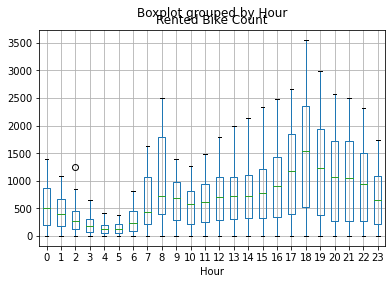

In [ ]:
dataset.boxplot(column='Rented Bike Count',by='Hour')

**We can see the peak hours on bike rented**

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


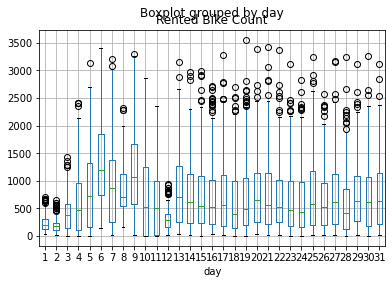

In [ ]:
dataset.boxplot(column='Rented Bike Count',by='day')

**We can see the days with high bikes rented**

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


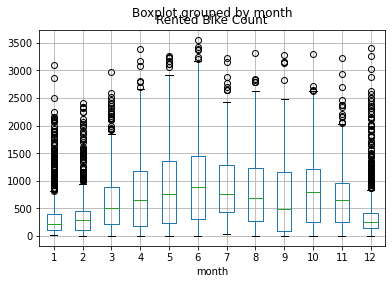

In [ ]:
dataset.boxplot(column='Rented Bike Count',by='month')

**We can see bikes rented based on month**

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


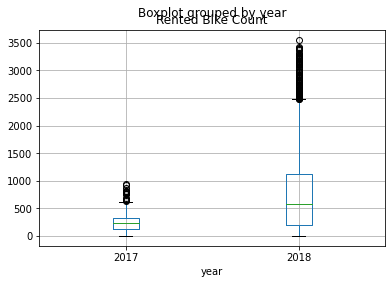

In [ ]:
dataset.boxplot(column='Rented Bike Count',by='year')

**The plot show increase in bike rents in 2018 than 2017**

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


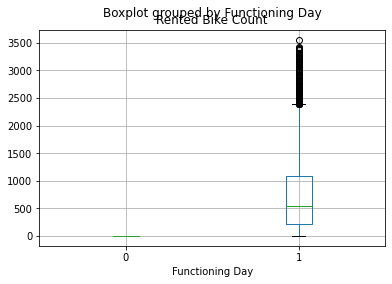

In [ ]:
dataset.boxplot(column='Rented Bike Count',by='Functioning Day')

**During Non-Functioning day the bikes cant be rented**

In [ ]:
dataset[dataset['Functioning Day']==1]

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Holiday,Functioning Day,Seasons_0,Seasons_1,Seasons_2,Seasons_3,day,month,year
0,254,0,-5.2,37,2.2,2000,0.0,0.0,0.0,1,1,0.0,0.0,0.0,1.0,12,1,2017
1,204,1,-5.5,38,0.8,2000,0.0,0.0,0.0,1,1,0.0,0.0,0.0,1.0,12,1,2017
2,173,2,-6.0,39,1.0,2000,0.0,0.0,0.0,1,1,0.0,0.0,0.0,1.0,12,1,2017
3,107,3,-6.2,40,0.9,2000,0.0,0.0,0.0,1,1,0.0,0.0,0.0,1.0,12,1,2017
4,78,4,-6.0,36,2.3,2000,0.0,0.0,0.0,1,1,0.0,0.0,0.0,1.0,12,1,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,1003,19,4.2,34,2.6,1894,0.0,0.0,0.0,1,1,1.0,0.0,0.0,0.0,30,11,2018
8756,764,20,3.4,37,2.3,2000,0.0,0.0,0.0,1,1,1.0,0.0,0.0,0.0,30,11,2018
8757,694,21,2.6,39,0.3,1968,0.0,0.0,0.0,1,1,1.0,0.0,0.0,0.0,30,11,2018
8758,712,22,2.1,41,1.0,1859,0.0,0.0,0.0,1,1,1.0,0.0,0.0,0.0,30,11,2018


In [ ]:
dataset[dataset['Functioning Day']==0]

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Holiday,Functioning Day,Seasons_0,Seasons_1,Seasons_2,Seasons_3,day,month,year
3144,0,0,14.4,82,4.6,1041,0.0,0.0,0.0,1,0,0.0,1.0,0.0,0.0,4,11,2018
3145,0,1,13.6,81,3.6,886,0.0,0.0,0.0,1,0,0.0,1.0,0.0,0.0,4,11,2018
3146,0,2,12.7,80,3.9,885,0.0,0.0,0.0,1,0,0.0,1.0,0.0,0.0,4,11,2018
3147,0,3,11.6,81,3.1,687,0.0,0.0,0.0,1,0,0.0,1.0,0.0,0.0,4,11,2018
3148,0,4,10.2,83,3.5,554,0.0,0.0,0.0,1,0,0.0,1.0,0.0,0.0,4,11,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8251,0,19,11.9,71,2.7,589,0.0,0.0,0.0,1,0,1.0,0.0,0.0,0.0,11,9,2018
8252,0,20,11.9,72,2.5,526,0.0,0.0,0.0,1,0,1.0,0.0,0.0,0.0,11,9,2018
8253,0,21,11.4,74,1.9,498,0.0,0.0,0.0,1,0,1.0,0.0,0.0,0.0,11,9,2018
8254,0,22,11.2,75,1.7,478,0.0,0.0,0.0,1,0,1.0,0.0,0.0,0.0,11,9,2018


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


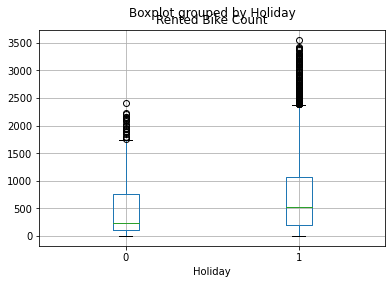

In [ ]:
dataset.boxplot(column='Rented Bike Count',by='Holiday')

**Most bikes are rented during Holidays**

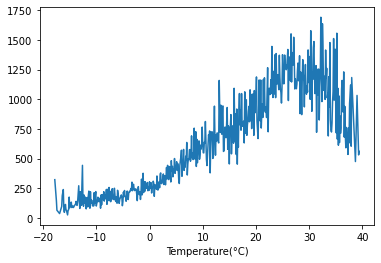

In [ ]:
dataset.groupby('Temperature(°C)').mean()['Rented Bike Count'].plot()

**The bike renting decreases after 30 degree Celcius**

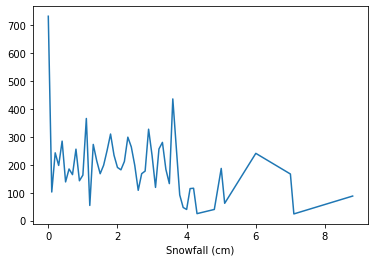

In [ ]:
dataset.groupby('Snowfall (cm)').mean()['Rented Bike Count'].plot()

**The bike renting decreases after 4 cm snowfall**

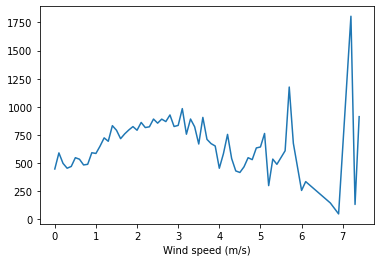

In [ ]:
dataset.groupby('Wind speed (m/s)').mean()['Rented Bike Count'].plot()

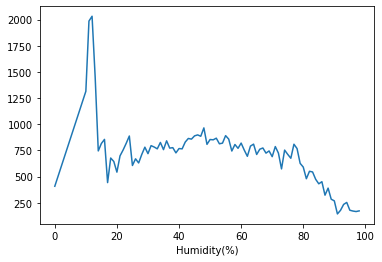

In [ ]:
dataset.groupby('Humidity(%)').mean()['Rented Bike Count'].plot()

**After 40% humidity the renting gradually decreases**

In [ ]:
Functioning_Days = dataset[dataset['Functioning Day']==1]

In [ ]:
X = Functioning_Days.drop(['Rented Bike Count'],axis=1)

In [ ]:
Y = Functioning_Days['Rented Bike Count']

In [ ]:
X

,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Holiday,Functioning Day,Seasons_0,Seasons_1,Seasons_2,Seasons_3,day,month,year
0,0,-5.2,37,2.2,2000,0.0,0.0,0.0,1,1,0.0,0.0,0.0,1.0,12,1,2017
1,1,-5.5,38,0.8,2000,0.0,0.0,0.0,1,1,0.0,0.0,0.0,1.0,12,1,2017
2,2,-6.0,39,1.0,2000,0.0,0.0,0.0,1,1,0.0,0.0,0.0,1.0,12,1,2017
3,3,-6.2,40,0.9,2000,0.0,0.0,0.0,1,1,0.0,0.0,0.0,1.0,12,1,2017
4,4,-6.0,36,2.3,2000,0.0,0.0,0.0,1,1,0.0,0.0,0.0,1.0,12,1,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,19,4.2,34,2.6,1894,0.0,0.0,0.0,1,1,1.0,0.0,0.0,0.0,30,11,2018
8756,20,3.4,37,2.3,2000,0.0,0.0,0.0,1,1,1.0,0.0,0.0,0.0,30,11,2018
8757,21,2.6,39,0.3,1968,0.0,0.0,0.0,1,1,1.0,0.0,0.0,0.0,30,11,2018
8758,22,2.1,41,1.0,1859,0.0,0.0,0.0,1,1,1.0,0.0,0.0,0.0,30,11,2018


In [ ]:
Y

0        254
1        204
2        173
3        107
4         78
        ... 
8755    1003
8756     764
8757     694
8758     712
8759     584
Name: Rented Bike Count, Length: 8465, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=50)

In [ ]:
X_train

,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Holiday,Functioning Day,Seasons_0,Seasons_1,Seasons_2,Seasons_3,day,month,year
7667,11,16.5,39,0.7,1351,1.68,0.0,0.0,1,1,1.0,0.0,0.0,0.0,16,10,2018
8405,5,6.9,66,0.5,698,0.00,0.0,0.0,1,1,1.0,0.0,0.0,0.0,16,11,2018
3680,8,10.5,67,2.3,1221,0.98,0.0,0.0,1,1,0.0,1.0,0.0,0.0,5,3,2018
3450,18,9.4,96,1.9,600,0.07,1.0,0.0,1,1,0.0,1.0,0.0,0.0,23,4,2018
6016,16,35.1,40,2.6,1989,2.29,0.0,0.0,1,1,0.0,0.0,1.0,0.0,8,8,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8557,13,6.5,26,2.4,1974,1.84,0.0,0.0,1,1,1.0,0.0,0.0,0.0,22,11,2018
6262,22,26.3,48,0.8,2000,0.00,0.0,0.0,1,1,0.0,0.0,1.0,0.0,18,8,2018
8619,3,2.6,88,0.9,319,0.00,0.0,2.8,1,1,1.0,0.0,0.0,0.0,25,11,2018
6301,13,31.6,46,2.7,1864,1.77,0.0,0.0,1,1,0.0,0.0,1.0,0.0,20,8,2018


In [ ]:
X_test

,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Holiday,Functioning Day,Seasons_0,Seasons_1,Seasons_2,Seasons_3,day,month,year
7857,9,10.1,72,1.1,728,0.90,0.0,0.0,1,1,1.0,0.0,0.0,0.0,24,10,2018
6069,21,31.3,55,0.9,2000,0.00,0.0,0.0,1,1,0.0,0.0,1.0,0.0,8,10,2018
3424,16,19.1,52,0.9,1583,0.37,0.0,0.0,1,1,0.0,1.0,0.0,0.0,22,4,2018
6242,2,23.4,53,1.1,2000,0.00,0.0,0.0,1,1,0.0,0.0,1.0,0.0,18,8,2018
3244,4,6.0,84,1.7,951,0.00,0.0,0.0,1,1,0.0,1.0,0.0,0.0,15,4,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1653,21,-6.3,48,2.2,1965,0.00,0.0,0.0,1,1,0.0,0.0,0.0,1.0,2,7,2018
2069,5,-0.7,41,0.9,1442,0.00,0.0,0.0,1,1,0.0,0.0,0.0,1.0,25,2,2018
4740,12,24.8,43,1.2,1943,3.27,0.0,0.0,1,1,0.0,0.0,1.0,0.0,16,6,2018
6970,10,21.7,60,1.7,1540,1.44,0.0,0.0,1,1,1.0,0.0,0.0,0.0,17,9,2018


In [ ]:
Y_train

7667     914
8405     151
3680    1946
3450      39
6016     839
        ... 
8557     678
6262    1681
8619     184
6301     847
5648    1820
Name: Rented Bike Count, Length: 6772, dtype: int64

In [ ]:
Y_test

7857    1151
6069    1641
3424     103
6242     698
3244     110
        ... 
1653     223
2069      37
4740    1525
6970     868
2323     799
Name: Rented Bike Count, Length: 1693, dtype: int64

In [ ]:
scalerTrain = preprocessing.StandardScaler().fit(X_train)
scalerTest = preprocessing.StandardScaler().fit(X_test)
X_train_Scaled=scalerTrain.transform(X_train)
X_test_Scaled=scalerTest.transform(X_test)

In [ ]:
Train_model_score={}
Test_model_score={}

In [ ]:
from sklearn import linear_model
from sklearn.metrics import r2_score,mean_squared_error

In [ ]:
linear_regressor = linear_model.LinearRegression()
fit_linear_regressor=linear_regressor.fit(X_train_Scaled, Y_train)
pred_linear_regressor_train=fit_linear_regressor.predict(X_train_Scaled)
pred_linear_regressor_test=fit_linear_regressor.predict(X_test_Scaled)

In [ ]:
train_set_r2_linear_regressor = r2_score(Y_train, pred_linear_regressor_train)
print('Linear model, R2 train score is : {} '.format(train_set_r2_linear_regressor))
test_set_r2_linear_regressor = r2_score(Y_test, pred_linear_regressor_test)
print('Linear model, R2 test score is : {}'.format(test_set_r2_linear_regressor))

Linear model, R2 train score is : 0.550553899493461 
Linear model, R2 test score is : 0.5122045409463628


In [ ]:
Train_model_score['Linear regression']=train_set_r2_linear_regressor
Test_model_score['Linear regression']=test_set_r2_linear_regressor

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

In [ ]:
decisionTree = DecisionTreeRegressor()
param = {'max_depth' : [1,4,5,6,7,8,10,15,20]}
gridSearch_decisionTree=GridSearchCV(decisionTree,param,scoring='r2',cv=6)
gridSearch_decisionTree.fit(X_train_Scaled,Y_train)
best_DecisionTree=gridSearch_decisionTree.best_estimator_

In [ ]:
pred_decisionTree_train=gridSearch_decisionTree.predict(X_train_Scaled)
pred_decisionTree_test=gridSearch_decisionTree.predict(X_test_Scaled)

In [ ]:
train_set_r2_decisionTree = r2_score(Y_train, pred_decisionTree_train)
print('DecisionTree model, R2 train score is : {:.2f} with max depth = {:.2f}'.format(train_set_r2_decisionTree,gridSearch_decisionTree.best_params_['max_depth']))
test_set_r2_decisionTree = r2_score(Y_test, pred_decisionTree_test)
print('DecisionTree model, R2 test score is : {:.2f} with max depth = {:.2f}'.format(test_set_r2_decisionTree,gridSearch_decisionTree.best_params_['max_depth']))

DecisionTree model, R2 train score is : 0.86 with max depth = 8.00
DecisionTree model, R2 test score is : 0.72 with max depth = 8.00


In [ ]:
Train_model_score['Decision Tree regression']=train_set_r2_decisionTree
Test_model_score['Decision Tree regression']=test_set_r2_decisionTree

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
randomForest = RandomForestRegressor()
param = {'n_estimators' : [int(x) for x in np.linspace(start=10,stop=100, num=10)], 
         'max_depth' : [60,70,80,90,100],
         'bootstrap' : [True,False]
        }
gridSearch_RandomForest=GridSearchCV(randomForest,param,scoring='r2',cv=3,n_jobs = -1)

In [ ]:
gridSearch_RandomForest.fit(X_train_Scaled,Y_train)
best_randomForest=gridSearch_RandomForest.best_estimator_

In [ ]:
pred_randomForest_train=gridSearch_RandomForest.predict(X_train_Scaled)
pred_randomForest_test=gridSearch_RandomForest.predict(X_test_Scaled)

In [ ]:
train_set_r2_randomForest = r2_score(Y_train, pred_randomForest_train)
print('randomForest model, R2 train score is : {:.2f} with max depth = {:.2f} with n estimators = {:.2f}'.format(train_set_r2_randomForest,gridSearch_RandomForest.best_params_['max_depth'],gridSearch_RandomForest.best_params_['n_estimators']))
test_set_r2_randomForest = r2_score(Y_test, pred_randomForest_test)
print('randomForest model, R2 test score is : {:.2f} with max depth = {:.2f} with n estimators = {:.2f}'.format(test_set_r2_randomForest,gridSearch_RandomForest.best_params_['max_depth'],gridSearch_RandomForest.best_params_['n_estimators']))

randomForest model, R2 train score is : 0.98 with max depth = 80.00 with n estimators = 100.00
randomForest model, R2 test score is : 0.80 with max depth = 80.00 with n estimators = 100.00


In [ ]:
Train_model_score['Random Forest regression']=train_set_r2_randomForest
Test_model_score['Random Forest regression']=test_set_r2_randomForest

In [ ]:
Train_model_score

{'Decision Tree regression': 0.8648848888066953,
 'Linear regression': 0.550553899493461,
 'Random Forest regression': 0.9823579169964737}

In [ ]:
Test_model_score

{'Decision Tree regression': 0.7176545649585424,
 'Linear regression': 0.5122045409463628,
 'Random Forest regression': 0.7960345961782811}

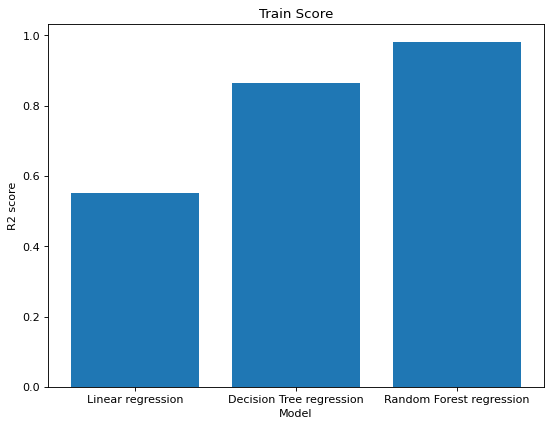

In [ ]:
plt.figure(figsize=(8, 6), dpi=80)
plt.bar(*zip(*Train_model_score.items()))
plt.title('Train Score')
plt.ylabel("R2 score")
plt.xlabel('Model')
plt.show()

**Random forest regression has the highest R2 score in training**

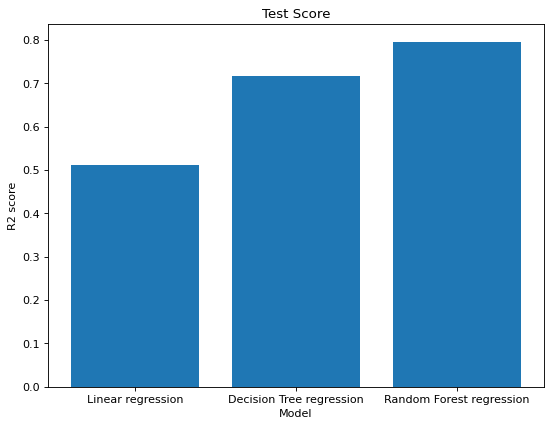

In [ ]:
w
plt.bar(*zip(*Test_model_score.items()))
plt.title('Test Score')
plt.ylabel("R2 score")
plt.xlabel('Model')
plt.show()

**Random forest regression has the highest R2 score in testing**

**CONCLUSION**

**1.The Random Forest Regression can be used for prediction as it have high performance compared to other algorithms.**

**2.The model can help the company to distribute the required bike count to satisfy the needs of the user at hourly basis.**



**SUMMARY**

**The data is from Seoul bike, the data is cleansed so there is no null value to handle. The aim is to train a model with the data to find the bike count prediction for suture so that to satisfy the users with the required bikes at correct hourly time intervals. Using heat map we can find the correlation of all feature and we can drop the feature with high correlation as it would only reduce the model performance. The dataset has both numerical and categorical features that need to be changed. Each feature has different impact on the dependant variable. The categorical variables can be converted to required format using label encoder and one hot encoder. The date also needs to be divided as day, month and year so that it would fit the model with the right way. The data is then scaled with standard scaler then are fed to the model. There are three models that are used namely, Linear regression, Decision tree regression, Random forest regression. Each model have different approaches so we cannot predict which model is best without working on the model as  each works differently for different dataset. The models are evaluated with R2 score metric to find which model performs better.  So of these three models Random forest regression has high score thus it can be used for the prediction of bike counts.**